# 17.1 핵심 개념
- Density-based spatial clustering of applications with noise
- 밀도 기반 클러스터링 기법
- 케이스가 집중되어 있는 밀도에 초점을 두어 밀도가 높은 그룹을 클러스터링 하는 방식
- 중심점을 기준으로 특정한 반경 이내에 케이스 n개 이상 있을 경우 하나를 군집을 형성하는 알고리즘
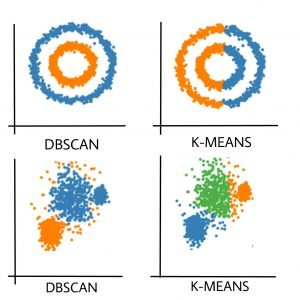

- DBSCAN 파라미터 : 
   1. ε: 근접 이웃접을 찾기 위해 정의 내려야 하는 반경 거리
   2. minPts : 하나의 군집을 형성하기 위해 필요한 최소 케이스 수


- 데이터의 케이스 : 
   1. Core point : ε 반경 내에 minPts 이상을 갖는 점
   2. Border point : Core point의 ε 반경 내에 있으나, 그 자체로는 최소점을 갖지 못하는 점
   3. Noise point : Core point도 아니고 Border point도 아닌점
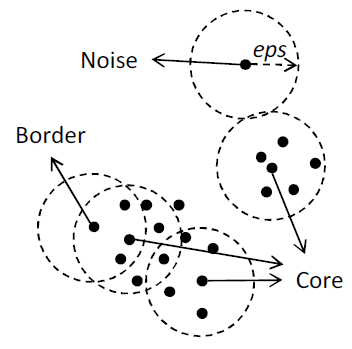


# 17.3 분석 코드

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris=pd.read_csv('../data/iris.csv')
iris_data=iris[iris.columns[:4]]
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5, metric='euclidean', min_samples=5)
dbscan

DBSCAN()

In [4]:
# 설정한 기준에 따르면 2개의 군집(0, 1)
# -1은 이상치로 파악된 데이터
dbscan.fit(iris_data)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [5]:
pred=dbscan.fit_predict(iris_data)
pred=pd.DataFrame(pred)
pred.columns=['predict']
pred.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [6]:
match_data=pd.concat([iris, pred], axis=1)
match_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,predict
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [7]:
# 이상치가 다소 많다. 반경을 좀 더 넓혀볼 필요가 있다.
cross=pd.crosstab(match_data['class'], match_data['predict'])
cross

predict,-1,0,1
class,,,
Iris-setosa,1,49,0
Iris-versicolor,6,0,44
Iris-virginica,10,0,40


In [8]:
# 차원 축소 : 주성분 분석
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(iris_data)
pca_2d=pca.transform(iris_data)

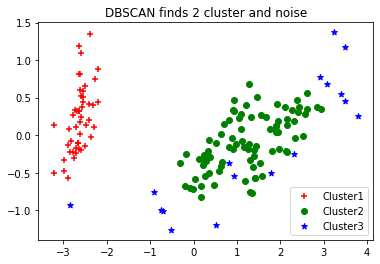

In [9]:
# 시각화
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i]==0:
        c1=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    if dbscan.labels_[i]==1:
        c2=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    if dbscan.labels_[i]==-1:
        c3=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1,c2,c3], ['Cluster1','Cluster2','Cluster3'])
plt.title('DBSCAN finds 2 cluster and noise')
plt.show()